In [17]:
import numpy as np
import pandas as pd
import seaborn as sns

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/Recipe%20Reviews%20and%20User%20Feedback%20Dataset.csv')

In [19]:
# Convert the 'created_at' column from UNIX timestamp to a readable datetime format
df['created_at'] = pd.to_datetime(df['created_at'], unit='s')
df

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,2022-10-13 00:11:29,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,2022-10-09 01:08:07,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,2022-09-28 22:35:57,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,2022-08-29 15:43:28,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,2022-10-04 20:03:43,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,2021-06-03 10:59:37,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,2021-02-11 09:45:20,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,2021-06-03 10:57:24,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,2021-06-03 10:47:13,0,0,0,5,100,I just made this too. It is wonderful. As fo...


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       18182 non-null  int64         
 1   recipe_number    18182 non-null  int64         
 2   recipe_code      18182 non-null  int64         
 3   recipe_name      18182 non-null  object        
 4   comment_id       18182 non-null  object        
 5   user_id          18182 non-null  object        
 6   user_name        18182 non-null  object        
 7   user_reputation  18182 non-null  int64         
 8   created_at       18182 non-null  datetime64[ns]
 9   reply_count      18182 non-null  int64         
 10  thumbs_up        18182 non-null  int64         
 11  thumbs_down      18182 non-null  int64         
 12  stars            18182 non-null  int64         
 13  best_score       18182 non-null  int64         
 14  text             18180 non-null  objec

In [21]:
# Drop rows with null values
df = df.dropna()

# Optional: Print the number of rows to verify
print(f"Number of rows after dropping null values: {len(df)}")

Number of rows after dropping null values: 18180


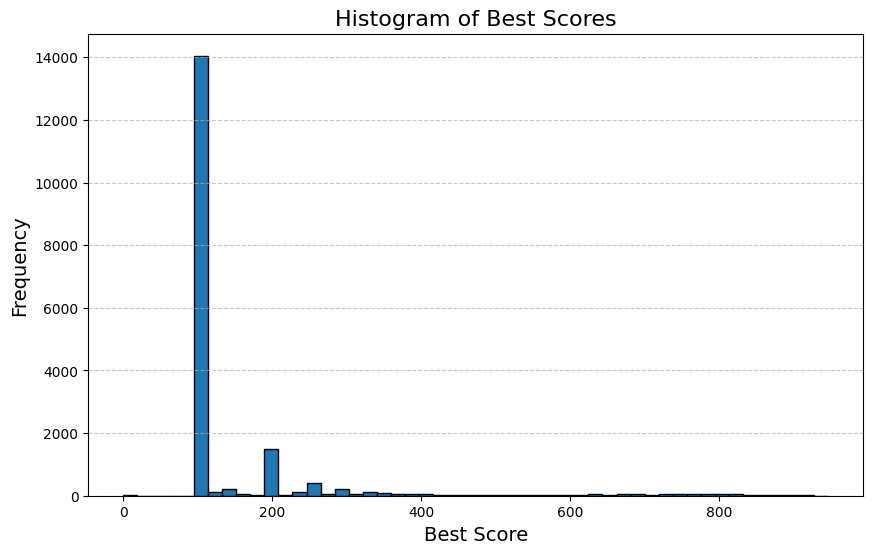

In [22]:
import matplotlib.pyplot as plt

# Plot the histogram for the 'best_score' column
plt.figure(figsize=(10, 6))
plt.hist(df['best_score'], bins=50, edgecolor='black')
plt.title('Histogram of Best Scores', fontsize=16)
plt.xlabel('Best Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [23]:
# Get the value counts for the 'recipe_name' column
recipe_name_counts = df['recipe_name'].value_counts()

# Display the top 10 most common recipe names
recipe_name_counts

recipe_name
Cheeseburger Soup               724
Creamy White Chili              654
Best Ever Banana Bread          509
Enchilada Casser-Ole!           421
Basic Homemade Bread            397
                               ... 
Peanut Butter Cup Cheesecake     96
Blueberry French Toast           90
Caramel Heavenlies               86
Lime Chicken Tacos               86
Vegetarian Linguine              31
Name: count, Length: 100, dtype: int64

In [24]:
# Ensure 'created_at' is in datetime format
if not pd.api.types.is_datetime64_any_dtype(df['created_at']):
    df['created_at'] = pd.to_datetime(df['created_at'])

# Get the minimum and maximum dates
min_date = df['created_at'].min()
max_date = df['created_at'].max()

print(f"Minimum date: {min_date}")
print(f"Maximum date: {max_date}")

Minimum date: 2021-02-11 09:22:16
Maximum date: 2022-10-14 14:00:35


/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_15461/1591178479.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['created_at'].dt.to_period('M')


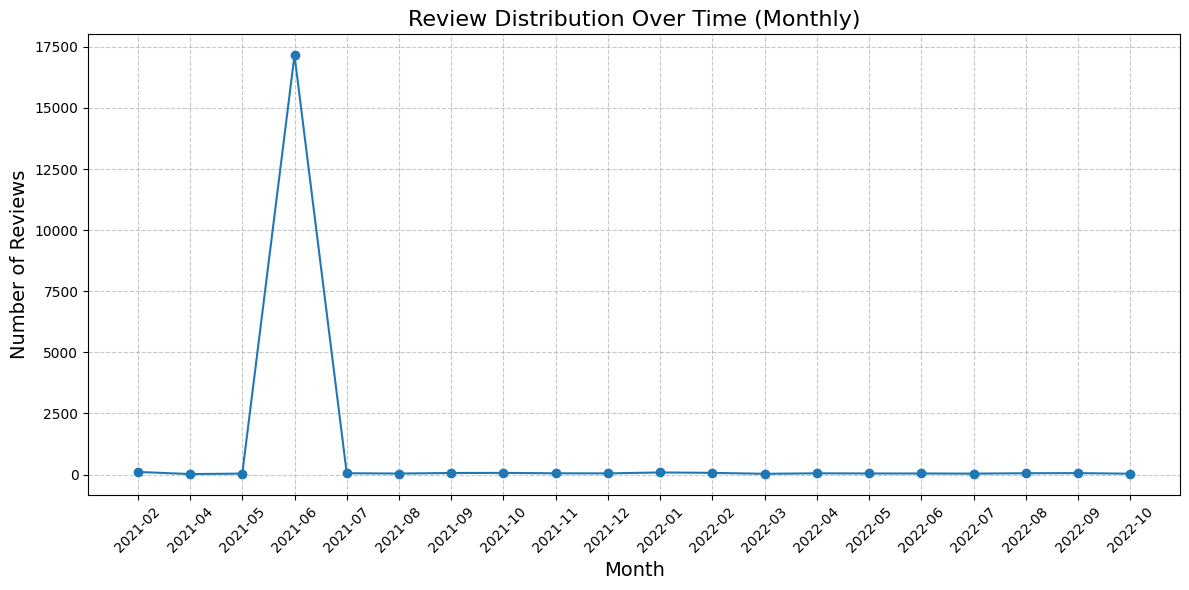

In [25]:
# review distribution over time
import matplotlib.pyplot as plt

# Group data by month and count reviews
df['month'] = df['created_at'].dt.to_period('M')
monthly_review_distribution = df.groupby('month').size()

# Plot the monthly distribution
plt.figure(figsize=(12, 6))
plt.plot(monthly_review_distribution.index.astype(str), monthly_review_distribution.values, marker='o')
plt.title('Review Distribution Over Time (Monthly)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [26]:
df['stars'].value_counts()

stars
5    13827
0     1696
4     1655
3      490
1      280
2      232
Name: count, dtype: int64